In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.cluster.hierarchy as sch
import nimfa

In [27]:
elsa = pd.read_csv(r'C:\Users\s1989190\Documents\GitHub\Structure-of-Frailty-ELSA\Analysis\Data\elsa_wave9.csv')
elsa.head()

,idauniq,indsex,age,frailty,num_nas,num_deficits,age_group,mob-walk100m,mob-sit2hrs,mob-stand_from_seated,...,gen-eyesight,gen-hearing,gen-fall,gen-hip_fracture,gen-joint_replacement,gen-pain_walking,mem_day_of_month,mem_month,mem_year,mem_day
0,104018,1,86,0.431034,1,25,86-90,1,0,1,...,0.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0
1,104232,2,66,0.103448,0,6,66-70,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105961,1,73,0.017241,0,1,70-75,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105988,2,82,0.068966,0,4,80-85,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,106516,2,81,0.034483,0,2,80-85,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Extract deficits only
deficits = elsa.loc[:, 'mob-walk100m': 'mem_day']
deficits = deficits.dropna() # Remove row with missing values
deficits

,mob-walk100m,mob-sit2hrs,mob-stand_from_seated,mob-stairs_several_flights,mob-stairs_1flight,mob-kneeling,mob-extend_arms,mob-push_pull,mob-lift_10lb,mob-pick_up_coin,...,gen-eyesight,gen-hearing,gen-fall,gen-hip_fracture,gen-joint_replacement,gen-pain_walking,mem_day_of_month,mem_month,mem_year,mem_day
1,0,0,1,1,1,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4967,1,1,1,1,1,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4968,0,0,1,1,1,1,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4969,0,0,1,0,0,1,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Change pandas df to matrix
deficits.values.shape

(4068, 58)

In [6]:
V = np.random.rand(40,100)
V.shape
bmf = nimfa.Bmf(V, seed = "nndsvd", rank = 10, max_iter = 12, lambda_w = 1.1, lambda_h = 1.1)
bmf_fit = bmf()
bmf.factorize()
bmf_fit.basis()
bmf_fit.coef()

array([[0.54952596, 0.66920699, 0.48567789, ..., 0.86495504, 0.20064595,
        0.1434253 ],
       [0.70938271, 0.47981707, 0.6473126 , ..., 0.88274197, 0.26397211,
        0.59694226],
       [0.17818713, 0.09816448, 0.25443823, ..., 0.17255473, 0.53129581,
        0.17783635],
       ...,
       [0.52906332, 0.68238712, 0.59954173, ..., 0.73407591, 0.71876354,
        0.47252001],
       [0.40507914, 0.26482817, 0.80611607, ..., 0.64386668, 0.39751936,
        0.22821144],
       [0.50673551, 0.31604483, 0.13507774, ..., 0.27467245, 0.17047711,
        0.873727  ]])

In [40]:
bmf = nimfa.Bmf(deficits.values, seed = "nndsvd", rank = 10, max_iter = 12, lambda_w = 1.1, lambda_h = 1.1)
bmf_fit = bmf()
bmf.factorize()

In [96]:
bmf_fit.basis() # Returns the matrix of basis vectors (Item Matrix)

matrix([[7.62124204e-01, 8.41640490e-01, 1.07198939e+00, ...,
         1.64159063e-01, 4.24300309e-01, 3.47370362e-01],
        [8.98373841e-01, 5.53435985e-09, 9.38210981e-02, ...,
         2.45905572e-01, 2.85153422e-02, 5.73493657e-02],
        [6.79104508e-01, 6.74159959e-01, 9.91786379e-01, ...,
         4.63184676e-02, 1.16770697e-01, 1.25199819e-01],
        ...,
        [4.08104071e-01, 1.32346463e+00, 1.14790534e+00, ...,
         4.61289522e-01, 6.01921128e-01, 7.15602590e-01],
        [1.03138790e+00, 9.16236870e-01, 9.41794931e-01, ...,
         2.92439735e-02, 6.76843958e-02, 6.74863291e-01],
        [1.07980834e+00, 1.27430566e-01, 7.35096938e-01, ...,
         8.13305300e-01, 9.18382681e-01, 7.64163231e-01]])

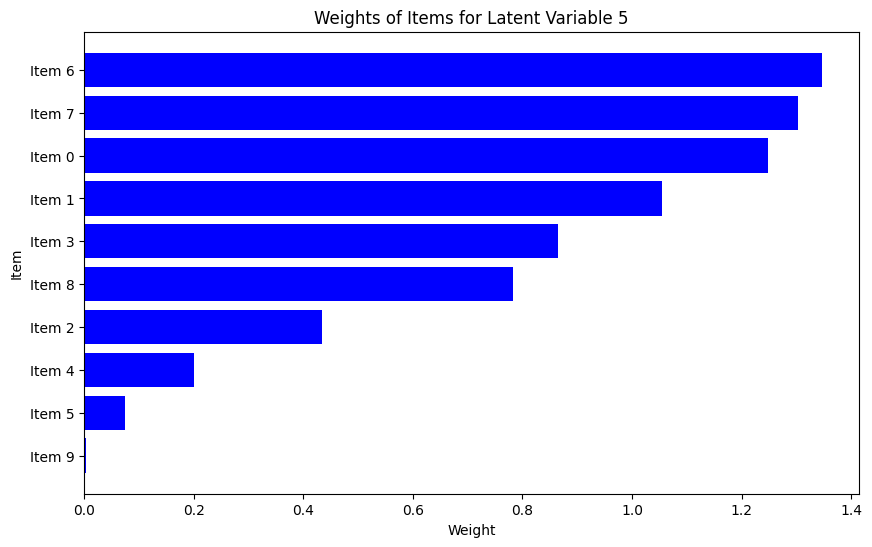

In [162]:
W = bmf_fit.fit.basis()

# Select the latent variable you're interested in
c = 5
k = 10

# Extract the corresponding column from the basis matrix
latent_vector = np.array(W)[:, c].flatten()[-k:]

# Get the indices of items sorted by their values
sorted_indices = np.argsort(latent_vector)

# Get the values (weights) of the sorted items
sorted_values = latent_vector[sorted_indices]

# Get the labels for the items (you can replace this with your actual item labels)
item_labels = [f"Item {idx}" for idx in sorted_indices]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(item_labels, sorted_values, color='blue')
plt.xlabel('Weight')
plt.ylabel('Item')
plt.title(f'Weights of Items for Latent Variable {c}')
plt.show()

Basis Shape: (4068, 10)


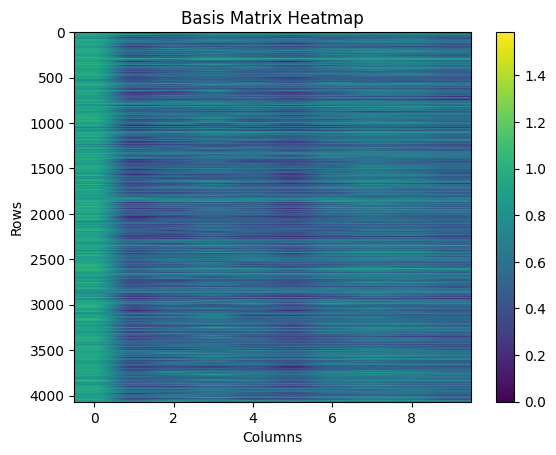

In [67]:
bmf_fit.basis() # Returns the matrix of basis vectors (Item Matrix)
print("Basis Shape:", bmf_fit.basis().shape)

plt.imshow(bmf_fit.basis(), cmap='viridis', aspect = 'auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Basis Matrix Heatmap')
plt.show()

Coef Shape: (10, 58)


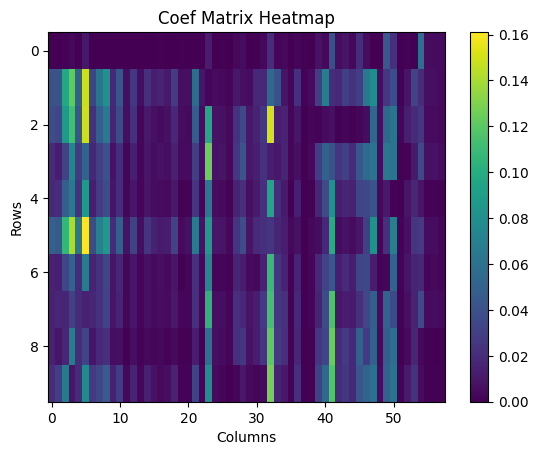

In [71]:
bmf_fit.coef() # Returns a matrix of mixture coefficients (User Matrix)
print("Coef Shape:", bmf_fit.coef().shape)

plt.imshow(bmf_fit.coef(), cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Coef Matrix Heatmap')
plt.show()

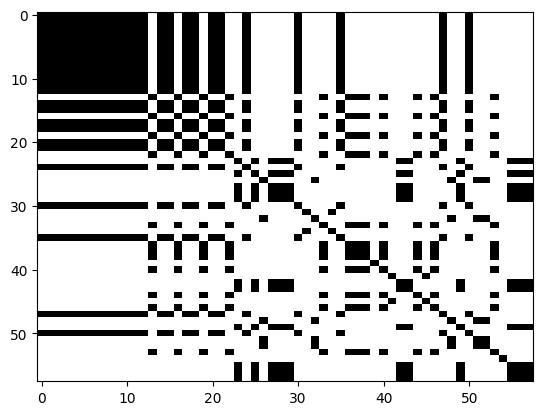

In [57]:
bmf.connectivity() # Computes the connectivity matrix for the samples based on their mixture coefficients.

plt.imshow(bmf.connectivity(), cmap='binary', aspect='auto')

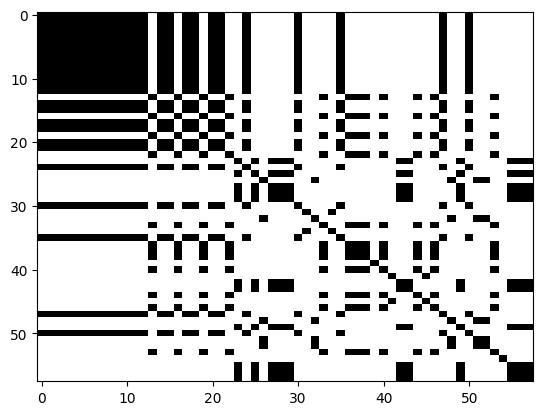

In [58]:
bmf.consensus()
plt.imshow(bmf.consensus(), cmap='binary', aspect='auto')

C:\Users\s1989190\AppData\Local\Temp\ipykernel_26564\1943614795.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(C, method='average')


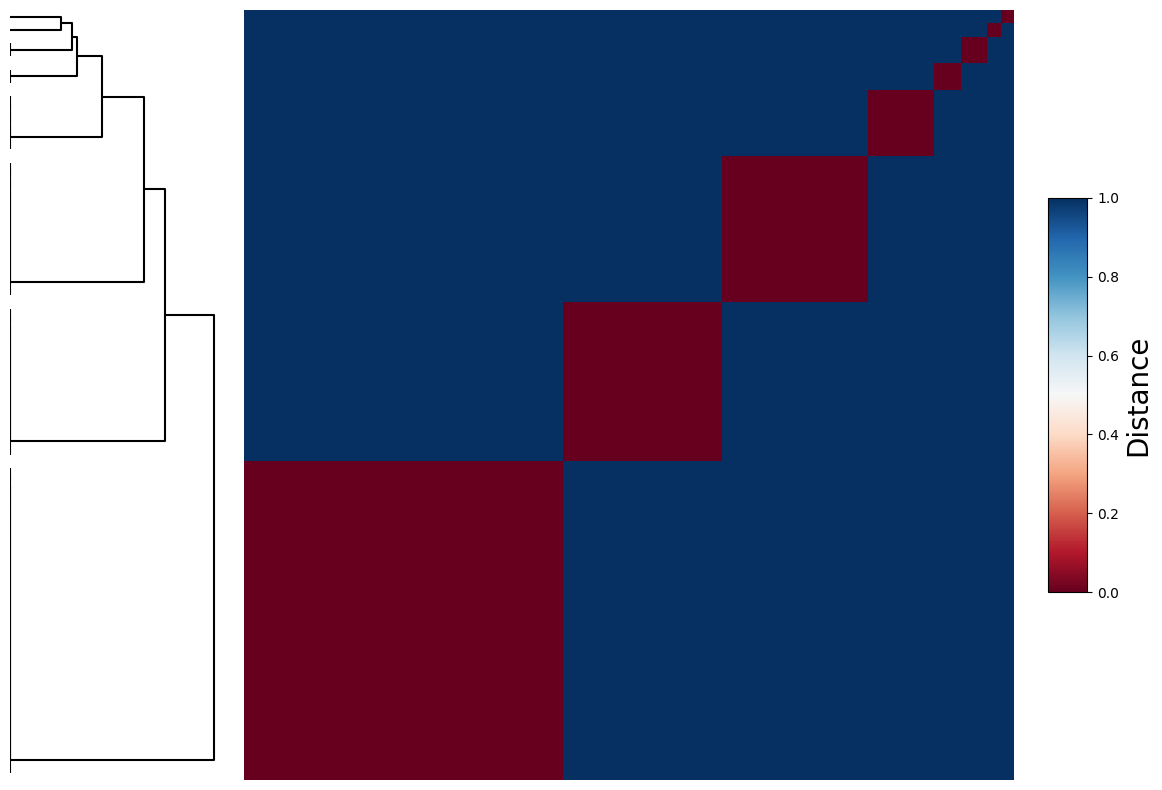

In [115]:
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25,1])

C = 1 - bmf_fit.fit.consensus()
Y = sch.linkage(C, method='average')

denAX = fig.add_subplot(heatmapGS[0,0])
denD = sch.dendrogram(Y, orientation='right', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0,1])
D = C[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu') 
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10) 
cb.set_label('Distance', fontsize=20)

In [62]:
bmf.coph_cor() # Computes cophenetic correlation coefficient of consensus matrix. Cophenetic correlation equals 1 for perfect consensus matrix.

1.0

In [59]:
bmf.dim()

(4068, 58, 10)

In [79]:
bmf.dispersion() # Computes the dispersion coefficient of consensus matrix. Dispersion is 1 for a perfect consensus matrix.

1.0

In [80]:
bmf.distance(metric = 'euclidean') # Returns the loss function value

15975.153809179876

In [83]:
bmf.estimate_rank() # Tries different values for ranks, performs factorisations, computes quality measures of the results and chooses the best value according to Brunet2004 and Hutchins2008

{30: {'rank': 30,
  'sparseness': (0.06713695605602492, 0.08457949785115362),
  'rss': 17885.170639296924,
  'evar': 0.3122146346986262,
  'residuals': matrix([[-0.13915125, -0.14026449,  0.67207737, ..., -0.02913844,
           -0.03084574, -0.02252668],
          [-0.06067831, -0.06608838, -0.14556226, ..., -0.01457847,
           -0.01519623, -0.0113543 ],
          [-0.12876787, -0.13038279,  0.69555431, ..., -0.0271656 ,
           -0.02874046, -0.0210079 ],
          ...,
          [-0.1496629 , -0.15032386,  0.64731195, ..., -0.03115966,
           -0.03301591, -0.02407959],
          [-0.12288572, -0.12469181,  0.70893435, ..., -0.02604351,
           -0.02753494, -0.02014761],
          [-0.11248461, -0.11496506, -0.2655361 , ..., -0.02404368,
           -0.02538878, -0.01863242]]),
  'connectivity': matrix([[1., 0., 1., ..., 1., 1., 1.],
          [0., 1., 0., ..., 0., 0., 0.],
          [1., 0., 1., ..., 1., 1., 1.],
          ...,
          [1., 0., 1., ..., 1., 1., 1.],
  

In [84]:
bmf.evar() # Computes the explained variance of the NMF estimate of the target matrix

0.24132318232272854

In [88]:
bmf.factorize() # Computes matrix factorisation and returns fitted factorisation model

In [91]:
bmf.fitted() #Computes the estimated target matrix according to the NMF algorithm model

matrix([[0.09604437, 0.10243177, 0.24011427, ..., 0.02503271, 0.02605398,
         0.01966775],
        [0.09604236, 0.10242963, 0.24010921, ..., 0.02503219, 0.02605344,
         0.01966734],
        [0.09604378, 0.10243115, 0.2401128 , ..., 0.02503256, 0.02605382,
         0.01966763],
        ...,
        [0.09604504, 0.10243249, 0.24011596, ..., 0.02503289, 0.02605416,
         0.01966788],
        [0.09604353, 0.10243088, 0.24011216, ..., 0.0250325 , 0.02605375,
         0.01966758],
        [0.09604325, 0.10243058, 0.24011145, ..., 0.02503242, 0.02605368,
         0.01966752]])

In [95]:
bmf.normalize()
bmf.basis()

matrix([[6.26990359e+21, 6.20891534e+21, 6.17400800e+21, ...,
         6.14531935e+21, 6.14544630e+21, 6.12618087e+21],
        [6.26977563e+21, 6.20878861e+21, 6.17388198e+21, ...,
         6.14519390e+21, 6.14532085e+21, 6.12605580e+21],
        [6.26986654e+21, 6.20887864e+21, 6.17397151e+21, ...,
         6.14528302e+21, 6.14540997e+21, 6.12614465e+21],
        ...,
        [6.26994682e+21, 6.20895815e+21, 6.17405056e+21, ...,
         6.14536172e+21, 6.14548867e+21, 6.12622311e+21],
        [6.26985045e+21, 6.20886271e+21, 6.17395565e+21, ...,
         6.14526724e+21, 6.14539419e+21, 6.12612892e+21],
        [6.26983254e+21, 6.20884497e+21, 6.17393802e+21, ...,
         6.14524969e+21, 6.14537664e+21, 6.12611142e+21]])

In [99]:
bmf.residuals() # Returns residuals matrix between the target matrix and its NMF estimate

matrix([[-1.15855893e+44, -1.23563196e+44, -2.89636715e+44, ...,
         -3.01977970e+43, -3.14296126e+43, -2.37258031e+43],
        [-1.15853528e+44, -1.23560674e+44, -2.89630803e+44, ...,
         -3.01971806e+43, -3.14289710e+43, -2.37253188e+43],
        [-1.15855208e+44, -1.23562466e+44, -2.89635003e+44, ...,
         -3.01976185e+43, -3.14294268e+43, -2.37256628e+43],
        ...,
        [-1.15856692e+44, -1.23564048e+44, -2.89638712e+44, ...,
         -3.01980052e+43, -3.14298292e+43, -2.37259666e+43],
        [-1.15854911e+44, -1.23562149e+44, -2.89634259e+44, ...,
         -3.01975410e+43, -3.14293461e+43, -2.37256019e+43],
        [-1.15854580e+44, -1.23561796e+44, -2.89633432e+44, ...,
         -3.01974547e+43, -3.14292563e+43, -2.37255341e+43]])

In [100]:
bmf.rss() # Compute Residual Sum of Squares (RSS) between NMF estimate and target matrix

8.96465786383705e+93

In [103]:
bmf.score_features() # Returns array with feature scores

array([2.15863011e-06, 2.15863145e-06, 2.15863050e-06, ...,
       2.15862981e-06, 2.15863071e-06, 2.15863077e-06])

In [107]:
bmf.select_features() # Returns a boolean array indicating whether features were selected

array([False, False, False, ..., False, False, False])

In [108]:
bmf.sparseness() # Returns tuples that contains sparseness of the basis and mixture coefficients matrices. 
#Spareseness of a matrix is mean spareseness of its columns vectors
#Sparser vector has value closer to 1

(0.023880782334704417, 6.026559574907609e-07)

In [110]:
bmf.target() # Returns the target matrix to estimate

matrix([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
# Latent dimensionality selection
rank_cands = range(3, 50, 5)
summary = bmf.estimate_rank(rank_range = rank_cands, n_run = 10, what = 'all')

In [119]:
summary[3].keys()

dict_keys(['rank', 'sparseness', 'rss', 'evar', 'residuals', 'connectivity', 'predict_samples', 'predict_features', 'score_features', 'select_features', 'dispersion', 'cophenetic', 'consensus', 'euclidean', 'kl', 'n_iter', 'n_run'])

In [122]:
rss = [summary[rank]['rss'] for rank in rank_cands]
coph = [summary[rank]['cophenetic'] for rank in rank_cands]
disp = [summary[rank]['dispersion'] for rank in rank_cands]
spar = [summary[rank]['sparseness'] for rank in rank_cands]
spar_w, spar_h = zip(*spar)
evar = [summary[rank]['evar'] for rank in rank_cands]

print("RSS", rss)

RSS [14675.467603096851, 15575.749848527335, 16461.00236906406, 16977.340842391382, 17375.083432298434, 17738.137034234547, 18096.00188731138, 18355.196122622605, 18592.847225023143, 18766.258053483467]


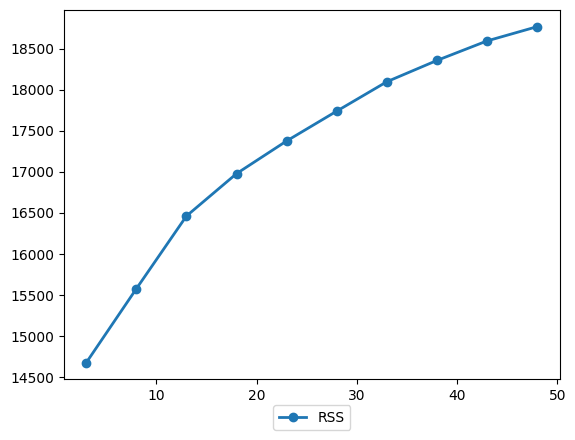

In [125]:
plt.plot(rank_cands, rss, 'o-', label='RSS', linewidth=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, numpoints=1);

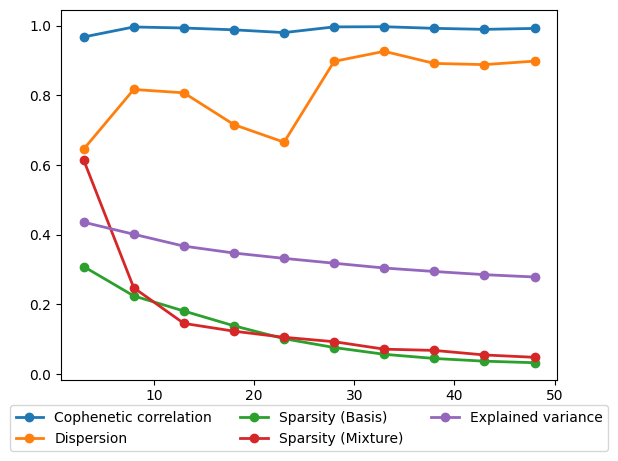

In [123]:

plt.plot(rank_cands, coph, 'o-', label='Cophenetic correlation', linewidth=2)
plt.plot(rank_cands, disp,'o-', label='Dispersion', linewidth=2)
plt.plot(rank_cands, spar_w, 'o-', label='Sparsity (Basis)', linewidth=2)
plt.plot(rank_cands, spar_h, 'o-', label='Sparsity (Mixture)', linewidth=2)
plt.plot(rank_cands, evar, 'o-', label='Explained variance', linewidth=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, numpoints=1);